<a href="https://colab.research.google.com/github/junho328/Daycon/blob/main/KBO_Batter_OPS_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 문제 정의

##1.1 평가척도 살펴보기
- WRMSE(Weighted Root Mean Square Error)
  - 비주전의 성적보다는 주전 선수의 성적을 예측하는 것이 더 중요할 것!
  - 왜냐하면 많은 타수를 기록한 선수가 적은 타수를 기록한 선수보다 WRMSE에 크게 기여하기 때문

##1.2 도메인 조사

## 주요 야구 용어
- OBP : 출루율
- SLG : 장타율
- OPS : OBP와 SLG의 합
- AB : 타수
- BB : 볼넷
- HBP : 사구
- SF : 희생 플라이
- AVG : 타율
- 1B, 2B, 3B : 1루타 / 2루타 / 3루타
- HR, H : 홈런 / 안타(1B+2B+3B+HR)

## 정규 시즌과 시범 경기
- 정규 시즌: 승패로 인한 최종 순위
- 시범 경기: 정규시즌 시작 전에 열리는 비공식 경기. 연습의 의미만 있음

##1.3 문제 해결을 위한 접근 방식
- 데이터의 수(행)에 비해 설명 변수(열)이 상대적으로 많음
  -> 분석에 필요 없는 데이터는 과감히 삭제하고 필요한 데이터만 분석에 맞게 적절히 변형. 가능한 한 단순한 모델을 만들어 예측 결과물을 산출하는 방식

#2 EDA

In [ ]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

##2.1 프리시즌 데이터 분석

In [ ]:
preseason_df = pd.read_csv('/content/drive/MyDrive/DayCon_Practice/KBO 타자 OPS/62540_KBO_prediction_data/Pre_Season_Batter.csv')
regular_season_df = pd.read_csv('/content/drive/MyDrive/DayCon_Practice/KBO 타자 OPS/62540_KBO_prediction_data/Regular_Season_Batter.csv')

In [ ]:
print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [ ]:
#데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


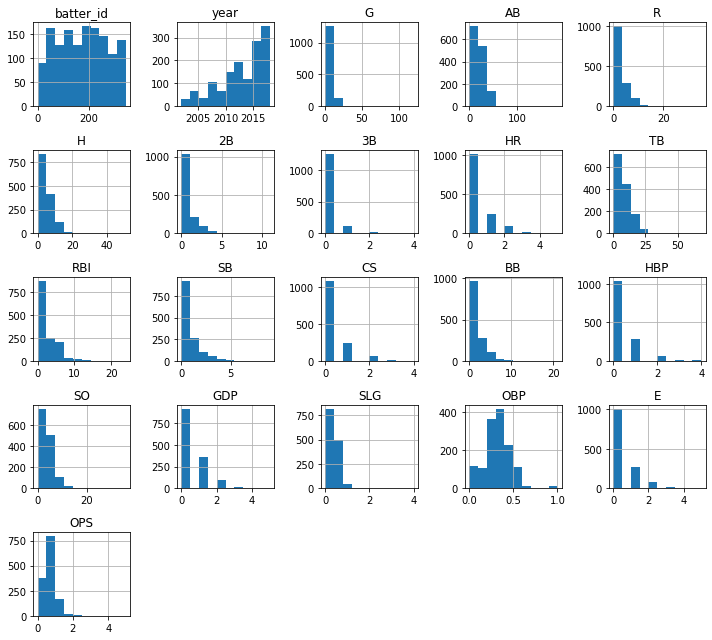

In [ ]:
#데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [ ]:
#정규시즌 데이터와 비교

#정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')

#프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')],axis=1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


표를 살펴보니 과거로 갈수록 프리시즌의 기록이 정규시즌보다 적어짐.
- 단순히 기록의 수를 비교한 것이기 때문에 프리시즌에 존재하지만 정규시즌에 존재하지 않거나 그 반대에 해당하는 기록이 있을 수 있음

In [ ]:
# 프리시즌의 성적과 정규 시즌의 성적 간의 상관관계 살펴보기
# 이를 위해 두 데이터에 공통으로 존재하는 선수들의 기록만 사용

In [ ]:
regular_season_df['new_idx'] = regular_season_df['batter_name']+ regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == regular_season_new['new_idx']) 

(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


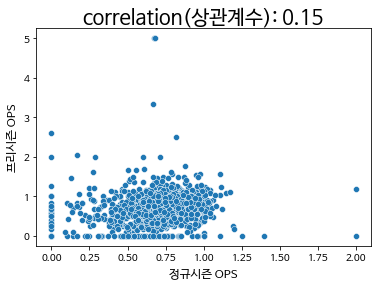

In [ ]:
# 정규시즌과 프리시즌의 상관관계 분석
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): '+ str(np.round(correlation,2)),fontsize=20)
plt.xlabel('정규시즌 OPS', fontsize=12)
plt.ylabel('프리시즌 OPS', fontsize=12)
plt.show()

시각화 결과, 선형적인 모습을 띠고 있지 않음
- 정규시즌 데이터와 프리시즌 데이터가 서로 상관성이 매우 낮다는 걸 의미함

=> 실제 분석에서는 프리시즌 데이터를 분석에서 제외한다. 예측 대상은 정규시즌의 성적이기 때문에 보다 더 정밀한 결과를 도출할 것

##2.2 정규시즌 데이터 분석

In [ ]:
#정규시즌 데이터 기초 통계량 분석
regular_season_df = pd.read_csv('/content/drive/MyDrive/DayCon_Practice/KBO 타자 OPS/62540_KBO_prediction_data/Regular_Season_Batter.csv')
display(regular_season_df.shape, regular_season_df.head(), regular_season_df.describe())

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


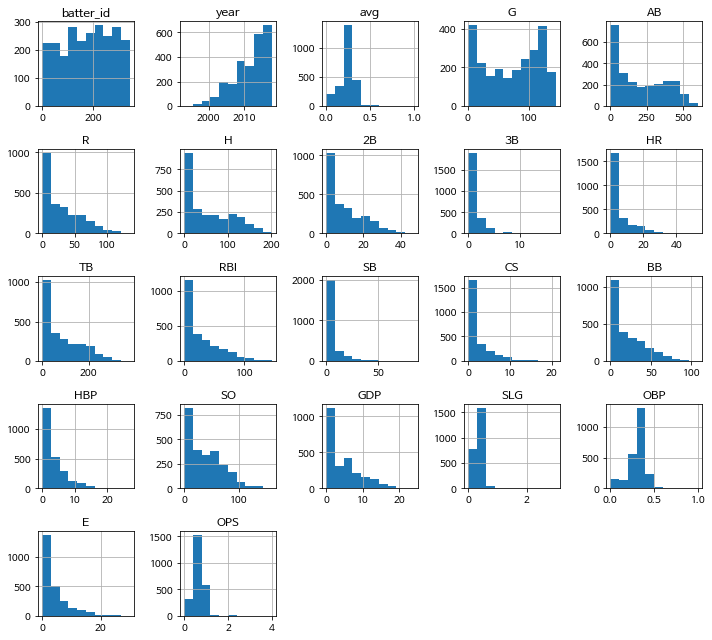

In [ ]:
# 정규시즌 데이터 시각화
regular_season_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

OPS가 0~4 사이의 값을 갖고 대부분의 값이 1이하임을 확인

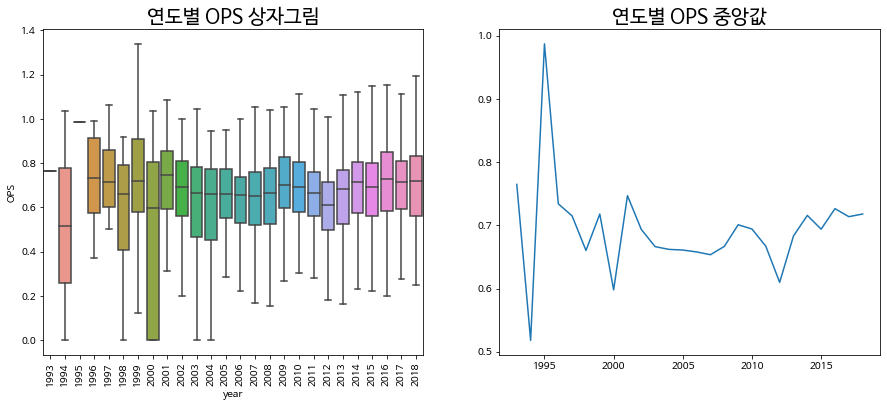

In [ ]:
# OPS를 box plot으로 시각화

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x='year',y='OPS',data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size= 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size= 20)
plt.show()

연도별 중앙값을 살펴보니 2000년도를 기준으로 OPS의 변동이 차이가 있음.
2000년도 이전의 기록은 변동이 상당히 크고 이후로는 상대적으로 변동폭이 크지 않은 추세를 보임

In [ ]:
# 연도별 OPS 더 자세히 살펴보기

pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


2000년도 이전에는 기록의 수가 매우 적었다는 걸 알 수 있음.
- 이 때문에 2000년도 이전 OPS의 변동 폭이 컸던 것임을 유추

In [ ]:
# 팀별 및 연도별 OPS 값 살펴보기
# 선수들의 성적은 팀의 성적에도 영향을 받기 때문에

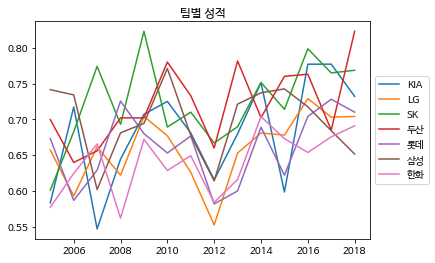

In [ ]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'],columns='year',values='OPS',aggfunc='median')

#2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0 # 결측치가 0인 팀만 추출

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns,
           loc='center left', bbox_to_anchor =(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('팀별 성적')
plt.show()

성적이 계속 달라지고 순위도 변동되는 걸 확인할 수 있음

In [ ]:
# 키와 몸무게 변수를 이용해 성적과 연관성이 있는지 확인해보기

In [ ]:
import re
regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


일반적으로 키에 비해 몸무게가 크다면 힘이 셀 것이며 반대의 경우에는 스피드가 빠를 것이라 추측할 수 있다
- 계산한 값이 크다면 힘과 연관성이 높은 장타율과의 상관관계를 확인
- 계산한 값이 작다면 스피드가 중시되는 출루율관의 상관관계를 확인

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


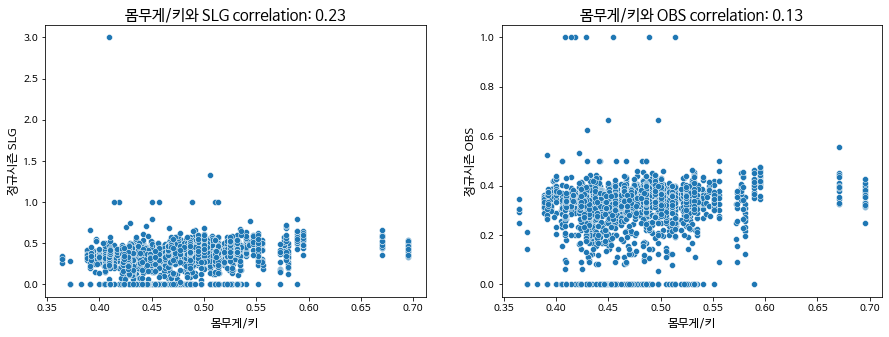

In [ ]:
regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']

plt.figure(figsize=(15,5))

#정규시즌과 장타율의 상관관계 계산
plt.subplot(1,2,1)
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title('몸무게/키와 SLG correlation: ' + str(np.round(correlation,2)), fontsize= 15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)

#정규시즌과 출루율의 상관관계 계산
plt.subplot(1,2,2)
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title('몸무게/키와 OBS correlation: ' + str(np.round(correlation,2)), fontsize= 15)
plt.ylabel('정규시즌 OBS', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)

plt.show()

데이터는 선형적인 모습을 띠고 있지 않으며 분포가 매우 고르다
- 몸무게 및 키가 장타율과 출루율에 큰 영향을 끼치지 않음

In [ ]:
#포지션과 관련된 기록 살펴보기

In [ ]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [ ]:
#포지션 분리

regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x : x.split('(')[0] if pd.notnull(x) else x
)

#우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x : x[-3:-1] if pd.notnull(x) else x
)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


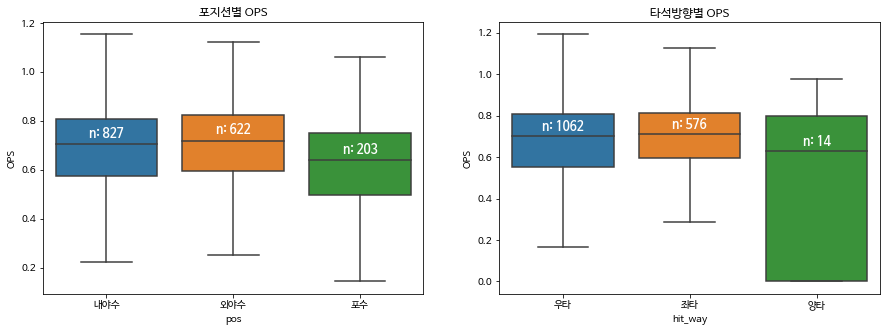

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos',y='OPS',data=regular_season_df, showfliers=False)

# 포지션 별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# 포지션 별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),
  medians[label.get_text()] + 0.03, nobs[label.get_text()],
  horizontalalignment='center', size='large', color='w', weight='semibold')

ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)
ax = sns.boxplot(x='hit_way',y='OPS', data= regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()

# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()

# 키 값을 'n:값' 형식으로 변환
for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()),
  medians[label.get_text()] + 0.03, nobs[label.get_text()],
  horizontalalignment='center', size='large', color='w', weight='semibold')

ax.set_title('타석방향별 OPS')

plt.show()

- 내야수와 외야수의 성적 차이는 크지 않으나, 포수는 수치가 다소 작음. 즉, 포수를 제외하면 OPS 성적에 포지션의 영향이 그리 크지 않다
- 양타의 경우엔 우타,좌타보다 다소 낮지만 관측수가 14개뿐이라 신뢰하기 힘듦

In [ ]:
# 외국인과 내국인 구별

In [ ]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [ ]:
# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-',' ').split(' ')[0]
)

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x
)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['쿠바', '네덜란드', '도미니카', '캐나다', '미국']

In [ ]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x : x if pd.isnull(x) else ('foreign' if x in foreign_country_list else 'korean')
)
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


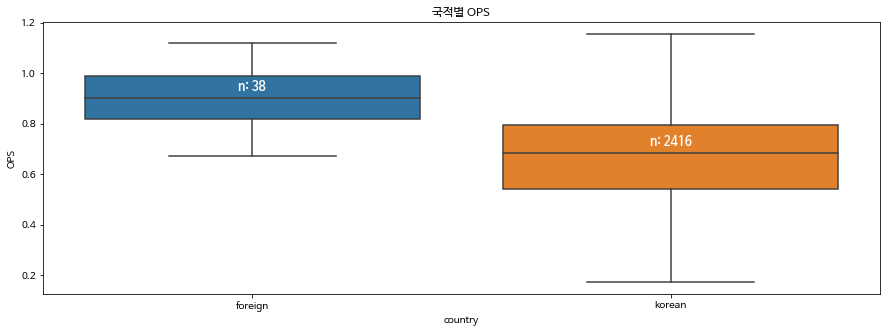

In [ ]:
# 외국인과 내국인 선수 성적 비교
plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country', y='OPS', data= regular_season_df, showfliers=False)

# 국적별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()

# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()

# 키 값을 'n:값' 형식으로 변환
for key in nobs: nobs[key] = 'n: ' + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
  ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()]+0.03, nobs[label.get_text()],
          horizontalalignment='center', size='large', color='w', weight = 'semibold')

ax.set_title('국적별 OPS')
plt.show()

- 평균적으로 외국인 선수들이 내국인 선수들보다 OPS 성적이 더 좋다

In [ ]:
# 첫 연봉 살펴보기

In [ ]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


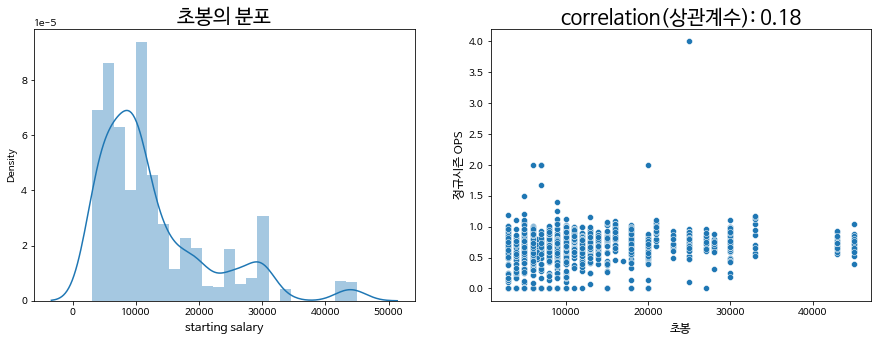

In [ ]:
# 초봉과 성적의 상관관계

# 결측치는 그대로 0으로 두고 '만원'이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다.
# 그 외 만 원 단위가 아닌 초봉은 결측치로 처리한다.

regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x) else (int(re.findall('\d+',x)[0]) if '만원' in x else np.nan)
    )

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()],hist=True)
b.set_xlabel('starting salary', fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

# 초봉과 OPS의 상관계수
plt.subplot(1,2,2)
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수): ' + str(np.round(correlation,2)), fontsize=20)
b.set_ylabel('정규시즌 OPS', fontsize=12)
b.set_xlabel('초봉',fontsize=12)
plt.show()

- 초봉과 OPS 성적은 큰 상관성을 보이지 않음

## 2.3 일별 데이터 분석

In [ ]:
day_by_day_df = pd.read_csv('/content/drive/MyDrive/DayCon_Practice/KBO 타자 OPS/62540_KBO_prediction_data/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [ ]:
# 연도별, 월별 데이터 변형

# 월 지정
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

# pivot table 이용하여 데이터 변형
agg_df = agg_df.pivot_table(index='month', columns='year', values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


In [ ]:
# 선수들의 연도와 월별 성적 변화를 더 정확히 살펴보기

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


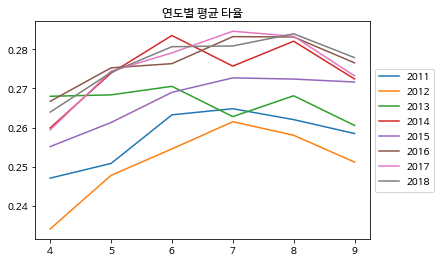

In [ ]:
display(agg_df.iloc[2:, 10:])
plt.plot(agg_df.iloc[2:,10:])
plt.legend(agg_df.iloc[2:, 10:].columns,
           loc='center left', bbox_to_anchor = (1,0.5))
plt.title('연도별 평균 타율')
plt.show()

- 시즌 시작 직후에는 대부분 성적이 높지 않음
- 5~6월에 되어서는 어느 정도 안정화됨
  - 상반기까지의 성적을 예측하는 데 매우 중요한 정보!

#2.4 EDA 요약
1. 프리시즌 데이터는 데이터 양에 있어서 충분치 못했다. 또한 정규시즌과 매우 상관성이 낮음.
  - 프리시즌 데이터는 사용하지 않겠다.

2. 정규시즌 데이터에서 OPS가 외국인 여부에 따라 다르게 분포함을 파악했다.

3. 정규시즌의 일별 데이터에서 연도별 월별 선수들의 누적 성적의 변화를 살펴봤다.
  - OPS 성적의 평균이 월별로 달라지고 7월 이후에 성적이 수렴되는 걸 파악함